<a href="https://colab.research.google.com/github/Christopher-Ramirez-S/An-lisis-de-datos/blob/Aaron/Copia_de_Laboratoriov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
import requests
import json
import concurrent.futures
import threading
import time
import logging
import os
from tqdm import tqdm
import datetime
import pandas as pd
import csv
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv')
data = pd.DataFrame(df)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1 Película más vieja
#objetivo: Descubrir cual es la película más vieja con fecha de lanzamiento
data['release_date']=pd.to_datetime(data['release_date'],errors='coerce') #remplaza con Not a time los que no tienen dates
data_con_fechas = data.dropna(subset=['release_date'])
pelicula_vieja = data_con_fechas[data_con_fechas['release_date'] == data_con_fechas['release_date'].min()]
print("Pelicula mas vieja")
print(pelicula_vieja)
print("fecha de lanzamiento")
print(data['release_date'])

Pelicula mas vieja
             id                                title  vote_average  \
603006  1294302  בראול סטארס בחיים האמיתיים-אלון קאט           0.0   

        vote_count    status release_date    revenue  runtime  adult  \
603006           0  Released   1800-01-01  100000000        0  False   

       backdrop_path  ...                       original_title overview  \
603006           NaN  ...  בראול סטארס בחיים האמיתיים-אלון קאט      NaN   

       popularity                       poster_path tagline  \
603006        0.6  /bCKTrWbglTHpTgl3crAhHZg7TgK.jpg     NaN   

                                       genres  production_companies  \
603006  Horror, Drama, Thriller, Mystery, War            Salty Fish   

       production_countries spoken_languages keywords  
603006                  NaN              NaN      NaN  

[1 rows x 24 columns]
fecha de lanzamiento
0        2010-07-15
1        2014-11-05
2        2008-07-16
3        2009-12-15
4        2012-04-25
            ...   

In [ ]:
#2 filtro de datos de 1910
# objetivo: Filtrar las fechas para poder hacer la investigación desde 1910 hasta 2024
start_date = pd.to_datetime('1910-01-01')
end_date = pd.to_datetime('2024-07-31')
filtered_data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]
filtered_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642753,1151019,"Cum Inside Me, White Boy",0.000,0,Released,2009-09-24,0,181,True,NaN,...,"Cum Inside Me, White Boy",These 5 white boys have got to be the luckiest...,0.000,/asYJoRUvkobuMtkQjKXoQ5PboAm.jpg,NaN,NaN,Mayhem XXX,United States of America,English,NaN
642754,1151020,Mute,0.000,0,Released,2021-11-05,0,23,False,NaN,...,Mute,"Monette, a recently separated travelling book ...",0.903,NaN,Confession is good for the soul.,"Horror, Mystery, Thriller, Drama",Pendle Films,NaN,NaN,"murder, hitchhiker, true crime, road movie, gr..."
642756,1151022,Once Upon a Slice in the West,0.000,0,Released,2022-09-04,0,1,False,NaN,...,Once Upon a Slice in the West,"In an old warehouse, a celebration among a gan...",0.600,/1RynGzGBqk9oPwcUAtL7V0kekt2.jpg,NaN,"Comedy, Western, Crime","Pendle Films, Parcel Face Productions",NaN,NaN,"gangster, pizza, standoff, western, characters"
642758,1151002,Mixtape,0.000,0,Released,2022-04-07,0,86,False,/gxocYqZbYLzQT9PzODuXQV8jgJ5.jpg,...,Mixtape,Mixtapes have an out-sized role in the emergen...,1.905,/6E0rQZ96Mc6fqGvfW7sbsChdVlQ.jpg,Never Play By The Rules,Documentary,NaN,NaN,English,NaN


In [ ]:
#3 Sacar las 10 peliculas con mayor votacion en todos los años
# objetivo: ver las películas mayor votadas para tener una idea de las mejores películas

MayorVot=filtered_data.sort_values(by='vote_count',ascending=False)
MayorVot.head(10)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,False,/en971MEXui9diirXlogOrPKmsEn.jpg,...,Deadpool,The origin story of former Special Forces oper...,72.735,/zq8Cl3PNIDGU3iWNRoc5nEZ6pCe.jpg,Witness the beginning of a happy ending.,"Action, Adventure, Comedy","20th Century Fox, The Donners' Company, Genre ...",United States of America,English,"superhero, anti hero, mercenary, based on comi..."
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,...,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa","sacrifice, magic, superhero, based on comic, s..."
7,550,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,False,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,...,Fight Club,A ticking-time-bomb insomniac and a slippery s...,69.498,/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg,Mischief. Mayhem. Soap.,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,"dual identity, rage and hate, based on novel o..."
8,118340,Guardians of the Galaxy,7.906,26638,Released,2014-07-30,772776600,121,False,/uLtVbjvS1O7gXL8lUOwsFOH4man.jpg,...,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",33.255,/r7vmZjiyZw9rpJMQJdXpjgiCOk9.jpg,All heroes start somewhere.,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,"spacec

Lab-4 formula

Estudiantes:
Adrian Rodriguez Rodriguez,
Christopher Ramirez Suarez,
Aaron Navarro Balmaceda,
Rafael Garcia Delgado,
eldon caldwell salazar,


Funcion a retornar conjunto de datos


In [ ]:
#4 funciones de lab 4 vistas en clase
# objetivo: mostrar datos de la columna seleccionada, con esto podemos saber los géneros a detalle
def mostrar_datos(df, columna):
  print(df[columna])

mostrar_datos(df, 'genres')

0                  Action, Science Fiction, Adventure
1                   Adventure, Drama, Science Fiction
2                      Drama, Action, Crime, Thriller
3         Action, Adventure, Fantasy, Science Fiction
4                  Science Fiction, Action, Adventure
                             ...                     
642756                         Comedy, Western, Crime
642757                                            NaN
642758                                    Documentary
642759                                    Documentary
642760                                            NaN
Name: genres, Length: 642761, dtype: object


Funcion que devulve la ubicacion de los elementos de la busqueda

In [ ]:
#5 buscar elementos
# objetivo: buscar las películas del género "Action" ya que fue de los más votados en la funcion '3' de la investigación
#   y luego contar cuantas películas hay con ese género
def getIndexes(dfObj, value):
    listOfPos = []
    result = dfObj.isin([value])
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)

    for col in columnNames:
        rows = list(result[col][result[col] == True].index)

        for row in rows:
            listOfPos.append((row, col))

    return listOfPos
listOfPositions = getIndexes(filtered_data, 'Action')

print(f"Primeras 20 index posiciones de 'Action' en Dataframe:")
lista = listOfPositions[:20]
for i in range(len(lista)):
    print(lista[i])

count = len(listOfPositions)
print(f"Número de películas de'Action': {count}")




Primeras 20 index posiciones de 'Action' en Dataframe:
(62548, 'title')
(68549, 'title')
(201791, 'title')
(330406, 'title')
(448902, 'title')
(457914, 'title')
(630037, 'title')
(636880, 'title')
(62548, 'original_title')
(448902, 'original_title')
(457914, 'original_title')
(630037, 'original_title')
(636880, 'original_title')
(261179, 'tagline')
(530730, 'tagline')
(2528, 'genres')
(2944, 'genres')
(3145, 'genres')
(3324, 'genres')
(3795, 'genres')
Número de películas de'Action': 4883


In [ ]:
#6 Distribución de géneros a lo largo de las décadas (1910-2024):
#Objetivo: Identificar cómo han cambiado las preferencias de género a lo largo de las décadas.
#.loc para modificar el dataframe de forma segura
# Filtrar las fechas entre 1910 y 2024
start_date = pd.to_datetime('1910-01-01')
end_date = pd.to_datetime('2024-07-31')
filtered_data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]
filtered_data.loc[:, 'release_date']= pd.to_datetime(filtered_data['release_date'], errors='coerce')  # Convertir fechas

# Elimina cualquier valor faltante de la columna 'release_date'
filtered_data = filtered_data.dropna(subset=['release_date'])


# Filtrar solo las columnas relevantes
filtered_data = filtered_data[['release_date', 'genres', 'title']].copy()

# Crear una nueva columna 'decade' que representa la década de la película
filtered_data.loc[:, 'decade'] = (filtered_data['release_date'].dt.year // 10) * 10

# Separar los géneros en múltiples filas para cada película (en caso de que tengan más de un género)
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios adicionales
filtered_data.loc[:, 'genres'] = filtered_data['genres'].str.strip()

# Agrupar por década y género, contando el número de películas
genre_by_decade = filtered_data.groupby(['decade', 'genres'])['title'].count().reset_index(name='movie_count')

# Imprimir solo los resultados que están dentro del rango 1910-2024
#print(genre_by_decade[(genre_by_decade['decade'] >= 1910) & (genre_by_decade['decade'] <= 2024)])
genre_by_decade = genre_by_decade[(genre_by_decade['decade'] >= 1910) & (genre_by_decade['decade'] <= 2024)]
genre_by_decade

,decade,genres,movie_count
0,1910,Action,76
1,1910,Adventure,161
2,1910,Animation,206
3,1910,Comedy,1542
4,1910,Crime,184
...,...,...,...
221,2020,Science Fiction,3385
222,2020,TV Movie,2874
223,2020,Thriller,8300
224,2020,War,720


In [ ]:
#7 Promedio de ingresos (revenue) por género a lo largo del tiempo:

#Objetivo: Ver cómo han cambiado los ingresos medios generados por películas de diferentes géneros.
# Filtrar las fechas entre 1910 y 2023
start_date = pd.to_datetime('1910-01-01')
end_date = pd.to_datetime('2023-12-31')
filtered_data = data[(data['release_date'] >= start_date) & (data['release_date'] <= end_date)]
filtered_data.loc[:, 'release_date']= pd.to_datetime(filtered_data['release_date'], errors='coerce')  # Convertir fechas

# Elimina cualquier valor faltante de la columna 'release_date'
filtered_data = filtered_data.dropna(subset=['release_date'])

# Filtrar solo las columnas relevantes
filtered_data = filtered_data[['release_date', 'genres', 'title', 'revenue']].copy()  # Asegúrate de incluir 'revenue'

# Crear una nueva columna 'decade' que representa la década de la película
filtered_data.loc[:, 'decade'] = (filtered_data['release_date'].dt.year // 10) * 10

# Separar los géneros en múltiples filas para cada película
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Asegurarse de que la columna 'revenue' es numérica
filtered_data['revenue'] = pd.to_numeric(filtered_data['revenue'], errors='coerce')

# Agrupar por década y género para calcular el promedio de ingresos
revenue_by_genre = filtered_data.groupby(['decade', 'genres'])['revenue'].mean().reset_index(name='average_revenue')

# Encontrar el género con el mayor promedio de ingresos por cada década
max_revenue_genre_by_decade = revenue_by_genre.loc[revenue_by_genre.groupby('decade')['average_revenue'].idxmax()]

# Ordenar por década de forma ascendente
max_revenue_genre_by_decade = max_revenue_genre_by_decade.sort_values(by='decade')

# Formatear los números con dos decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Mostrar floats con 2 decimales

# Mostrar el resultado
max_revenue_genre_by_decade


,decade,genres,average_revenue
14,1910,Science Fiction,250000.00
34,1920,War,367046.08
53,1930,War,1899790.17
62,1940,Family,1340965.03
82,1950,Fantasy,1595531.75
94,1960,Adventure,1376102.65
126,1970,Science Fiction,4004130.02
132,1980,Adventure,7024158.52
151,1990,Adventure,16817311.05
170,2000,Adventure,31986811.70


In [ ]:
#8 Películas más votadas por género (top):

#Objetivo: Encontrar las películas con más votos dentro de cada género.
filtered_data = data[['release_date', 'genres', 'title', 'revenue', 'vote_count']].copy() #se añadió "vote_count" al filtered data
# Separar los géneros en múltiples filas para cada película
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Asegurarse de que la columna 'vote_count' está en formato numérico
filtered_data['vote_count'] = pd.to_numeric(filtered_data['vote_count'], errors='coerce')

# Obtener la película más votada por cada género (Top 1)
top_voted_movies_by_genre = filtered_data.groupby('genres').apply(lambda x: x.nlargest(1, 'vote_count'))[['title', 'genres', 'vote_count']]
# Resetear el índice para una visualización más limpia
top_voted_movies_by_genre = top_voted_movies_by_genre.reset_index(drop=True)

# Imprimir
top_voted_movies_by_genre


,title,genres,vote_count
0,Inception,Action,34495
1,Inception,Adventure,34495
2,Inside Out,Animation,19463
3,Deadpool,Comedy,28894
4,The Dark Knight,Crime,30619
5,Harry Potter 20th Anniversary: Return to Hogwarts,Documentary,3084
6,Interstellar,Drama,32571
7,Inside Out,Family,19463
8,Avatar,Fantasy,29815
9,The Imitation Game,History,15973


In [ ]:
#9 top 5 peliculas del género war
# objetivo: ver cuales son las 5 películas con más votos del segundo género más recaudado a lo largo de las decadas
top_5_war = filtered_data[(filtered_data['genres'] == 'War')].nlargest(5, 'vote_count')[['title', 'genres', 'vote_count', 'release_date']]
print("\nTop 5 War Movies:")
top_5_war


Top 5 War Movies:


,title,genres,vote_count,release_date
30,Inglourious Basterds,War,20746,2009-08-19
91,The Imitation Game,War,15973,2014-11-14
102,Dunkirk,War,15464,2017-07-19
116,Saving Private Ryan,War,14658,1998-07-24
119,Schindler's List,War,14594,1993-12-15


In [ ]:
#10 top 5 peliculas del genero adventure
# objetivo: ver cuales son las 5 películas con más votos del género más recaudado a lo largo de las decadas
top_5_adventure = filtered_data[(filtered_data['genres'] == 'Adventure')].nlargest(5, 'vote_count')[['title', 'genres', 'vote_count', 'release_date']]


print("Top 5 Adventure Movies:")
top_5_adventure


Top 5 Adventure Movies:


,title,genres,vote_count,release_date
0,Inception,Adventure,34495,2010-07-15
1,Interstellar,Adventure,32571,2014-11-05
3,Avatar,Adventure,29815,2009-12-15
4,The Avengers,Adventure,29166,2012-04-25
5,Deadpool,Adventure,28894,2016-02-09


In [ ]:

#lab 5 nuevo dataset
import pandas as pd
df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv')
peliculas_LOTR = [
    'The Lord of the Rings: The Fellowship of the Ring',
    'The Lord of the Rings: The Two Towers',
    'The Lord of the Rings: The Return of the King',
    'The Hobbit: An Unexpected Journey',
    'The Hobbit: The Desolation of Smaug',
    'The Hobbit: The Battle of the Five Armies',
]
pelicula_mayor_votos = df[df['title'].isin(peliculas_LOTR)]['vote_count'].max()
print("La película de LOTR con más votos:")
print(pelicula_mayor_votos)


La película de LOTR con más votos:
23323


In [ ]:
import pandas as pd

df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv')


peliculas_LOTR_trilogia = [
    'The Lord of the Rings: The Fellowship of the Ring',
    'The Lord of the Rings: The Two Towers',
    'The Lord of the Rings: The Return of the King'
]

promedio_popularidad = df[df['title'].isin(peliculas_LOTR_trilogia)]['popularity'].mean()

print(f"El promedio de popularidad de la trilogía original de El Señor de los Anillos es: {promedio_popularidad}")


El promedio de popularidad de la trilogía original de El Señor de los Anillos es: 88.34766666666667


In [ ]:
import pandas as pd

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_filtered = df[(df['release_date'].dt.year >= 2010) & (df['release_date'].dt.year <= 2019)]


average_revenue = df_filtered['revenue'].mean()
print(f"The average revenue for movies released between 2010 and 2019 is: {average_revenue}")



The average revenue for movies released between 1910 and 2020 is: 1048653.7957324078


In [ ]:

avengers_movies = df[df['title'].str.contains('Avengers', case=False, na=False)]

average_avengers_revenue = avengers_movies['revenue'].mean()


print(f"The average revenue for all Avengers movies is: {average_avengers_revenue}")

average_avengers_popularity = avengers_movies['popularity'].mean()
print(f"The average popularity for all Avengers movies is: {average_avengers_popularity}")

average_avengers_vote_average = avengers_movies['vote_average'].mean()
print(f"The average vote average for all Avengers movies is: {average_avengers_vote_average}")

The average revenue for all Avengers movies is: 96737288.44444445
The average popularity for all Avengers movies is: 8.991851851851852
The average vote average for all Avengers movies is: 3.3468271604938273


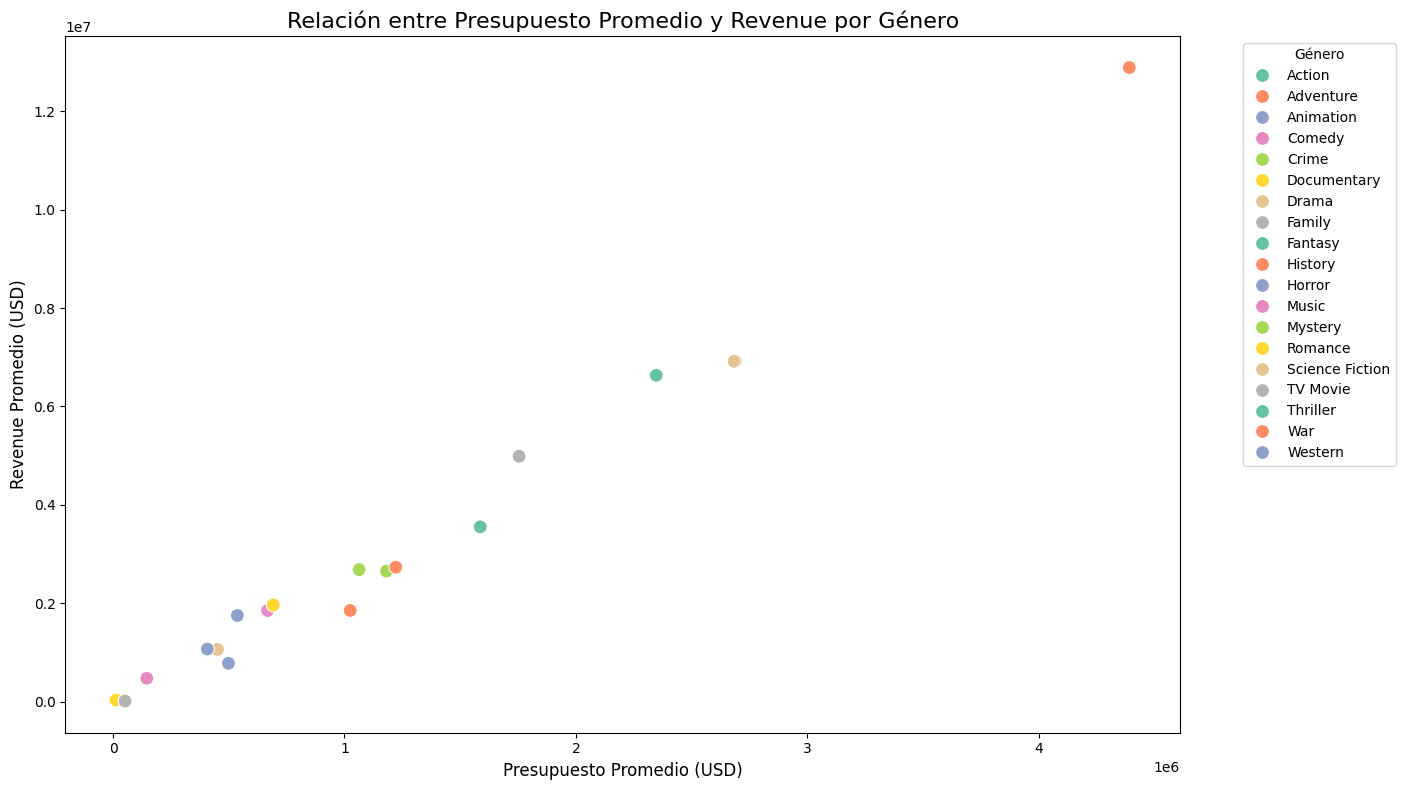

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Intentar cargar el dataset ignorando posibles errores de tokenización o líneas problemáticas
try:
    df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv',engine='python')
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

# Asegurarse de que los datos están en formato DataFrame
data = pd.DataFrame(df)

# ===========================
# Gráfico: Relación entre presupuesto promedio y revenue por género
# ===========================

# Filtrar las columnas relevantes
filtered_data = data[['genres', 'budget', 'revenue']].copy()

# Separar los géneros en múltiples filas para cada película
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Asegurarse de que las columnas 'budget' y 'revenue' son numéricas
filtered_data['budget'] = pd.to_numeric(filtered_data['budget'], errors='coerce')
filtered_data['revenue'] = pd.to_numeric(filtered_data['revenue'], errors='coerce')

# Eliminar filas con datos nulos o faltantes en presupuesto o revenue
filtered_data = filtered_data.dropna(subset=['budget', 'revenue'])

# Agrupar por género y calcular el presupuesto y revenue promedio por género
genre_financials = filtered_data.groupby('genres').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Crear el gráfico de dispersión (scatter plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='revenue', data=genre_financials, hue='genres', palette='Set2', s=100)

# Título y etiquetas
plt.title('Relación entre Presupuesto Promedio y Revenue por Género', fontsize=16)
plt.xlabel('Presupuesto Promedio (USD)', fontsize=12)
plt.ylabel('Revenue Promedio (USD)', fontsize=12)

# Ajustar la gráfica para una mejor visualización
plt.tight_layout()
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


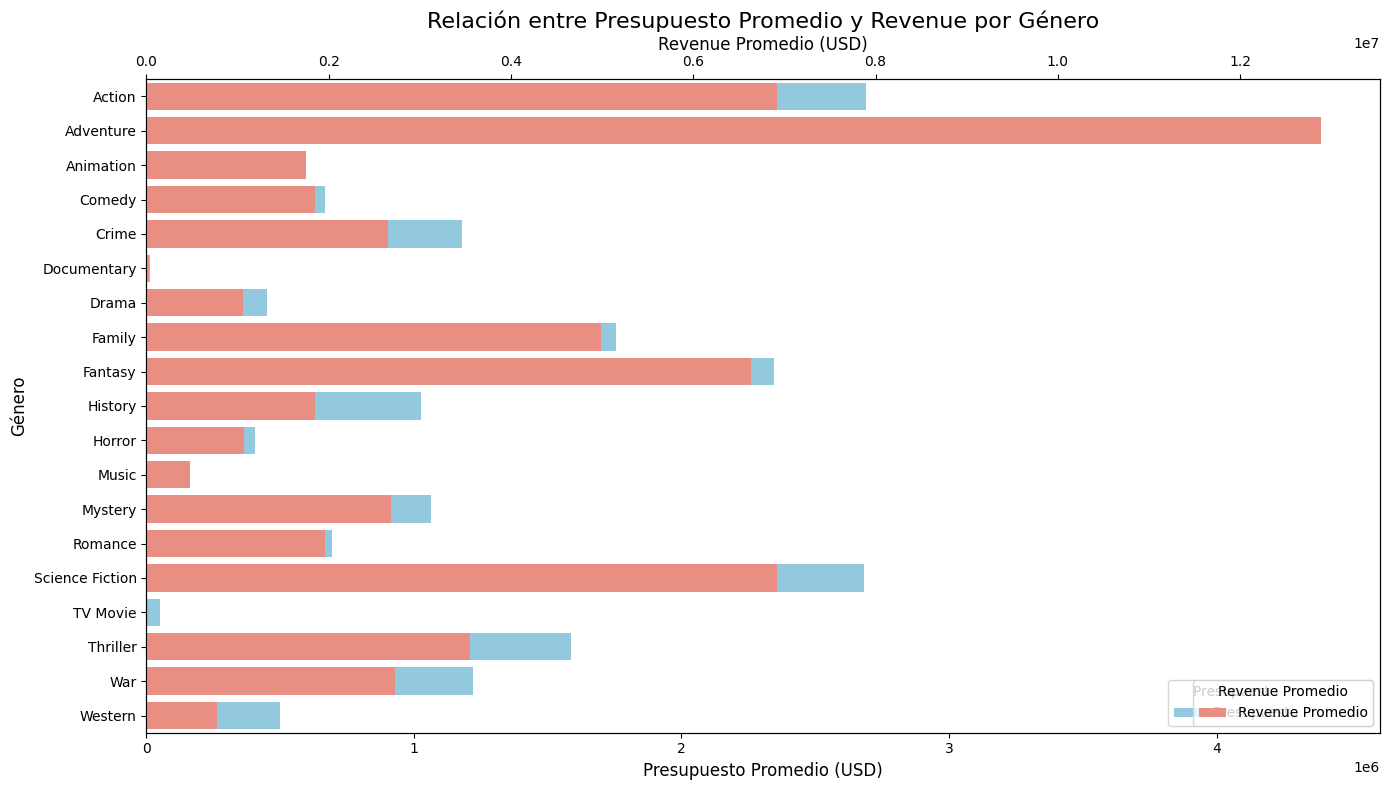

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Intentar cargar el dataset ignorando posibles errores de tokenización o líneas problemáticas
try:
    df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv',engine='python')
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

# Asegurarse de que los datos están en formato DataFrame
data = pd.DataFrame(df)

# ===========================
# Gráfico: Relación entre presupuesto promedio y revenue por género
# ===========================

# Filtrar las columnas relevantes
filtered_data = data[['genres', 'budget', 'revenue']].copy()

# Separar los géneros en múltiples filas para cada película
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Asegurarse de que las columnas 'budget' y 'revenue' son numéricas
filtered_data['budget'] = pd.to_numeric(filtered_data['budget'], errors='coerce')
filtered_data['revenue'] = pd.to_numeric(filtered_data['revenue'], errors='coerce')

# Eliminar filas con datos nulos o faltantes en presupuesto o revenue
filtered_data = filtered_data.dropna(subset=['budget', 'revenue'])

# Agrupar por género y calcular el presupuesto y revenue promedio por género
genre_financials = filtered_data.groupby('genres').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Crear el gráfico de barras con dos ejes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Crear las barras para el presupuesto
sns.barplot(x='budget', y='genres', data=genre_financials, color='skyblue', label='Presupuesto Promedio', errorbar=None, ax=ax1)

# Crear un segundo eje para el revenue
ax2 = ax1.twiny()  # Crear un segundo eje X
sns.barplot(x='revenue', y='genres', data=genre_financials, color='salmon', label='Revenue Promedio', errorbar=None, ax=ax2)

# Títulos y etiquetas
ax1.set_title('Relación entre Presupuesto Promedio y Revenue por Género', fontsize=16)
ax1.set_xlabel('Presupuesto Promedio (USD)', fontsize=12)
ax2.set_xlabel('Revenue Promedio (USD)', fontsize=12)
ax1.set_ylabel('Género', fontsize=12)

# Añadir la leyenda
ax1.legend(title='Presupuesto Promedio')
ax2.legend(title='Revenue Promedio')

# Ajustar la gráfica para una mejor visualización
plt.tight_layout()
plt.show()


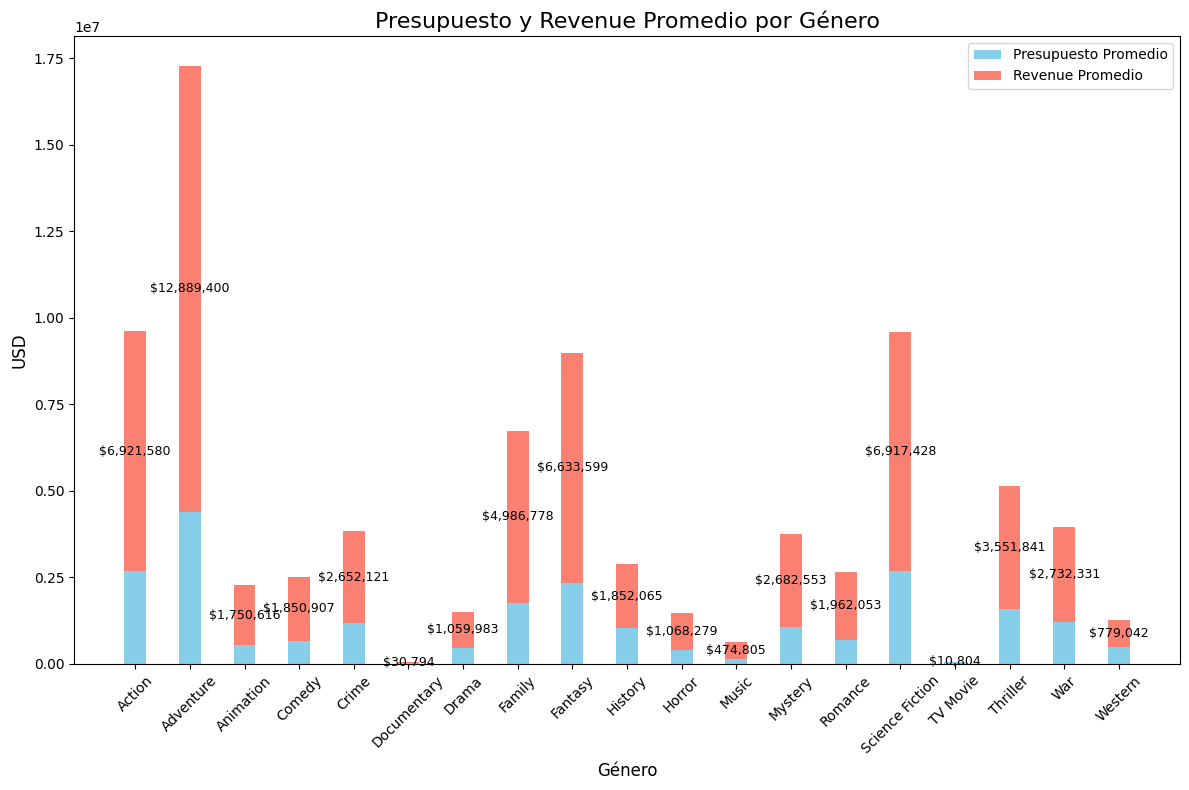

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Intentar cargar el dataset ignorando posibles errores de tokenización o líneas problemáticas
try:
    df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv',engine='python')
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

# Asegurarse de que los datos están en formato DataFrame
data = pd.DataFrame(df)

# Filtrar las columnas relevantes
filtered_data = data[['genres', 'budget', 'revenue']].copy()

# Separar los géneros en múltiples filas para cada película
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Asegurarse de que las columnas 'budget' y 'revenue' son numéricas
filtered_data['budget'] = pd.to_numeric(filtered_data['budget'], errors='coerce')
filtered_data['revenue'] = pd.to_numeric(filtered_data['revenue'], errors='coerce')

# Eliminar filas con datos nulos o faltantes en presupuesto o revenue
filtered_data = filtered_data.dropna(subset=['budget', 'revenue'])

# Agrupar por género y calcular el presupuesto y revenue promedio por género
genre_financials = filtered_data.groupby('genres').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = range(len(genre_financials))

# Crear las barras para el presupuesto y revenue
plt.bar(index, genre_financials['budget'], bar_width, label='Presupuesto Promedio', color='skyblue')
plt.bar(index, genre_financials['revenue'], bar_width, bottom=genre_financials['budget'], label='Revenue Promedio', color='salmon')

# Agregar etiquetas y título
plt.xlabel('Género', fontsize=12)
plt.ylabel('USD', fontsize=12)
plt.title('Presupuesto y Revenue Promedio por Género', fontsize=16)
plt.xticks(index, genre_financials['genres'], rotation=45)
plt.legend()

# Agregar etiquetas en las barras
for i in range(len(genre_financials)):
    plt.text(i, genre_financials['budget'].iloc[i] + genre_financials['revenue'].iloc[i] / 2,
             f"${genre_financials['revenue'].iloc[i]:,.0f}",
             ha='center', va='center', fontsize=9, color='black')

# Ajustar la gráfica para una mejor visualización
plt.tight_layout()
plt.show()


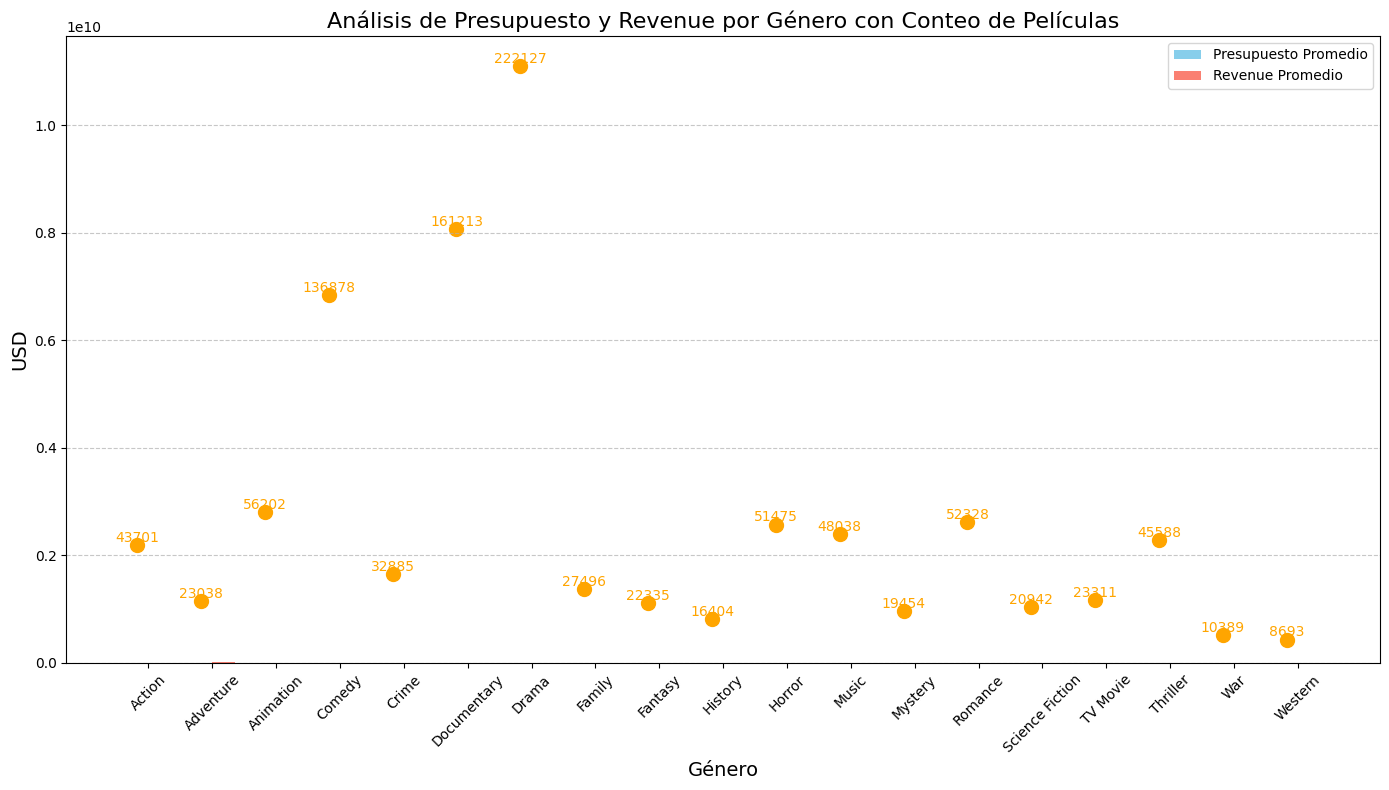

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Intentar cargar el dataset ignorando posibles errores de tokenización o líneas problemáticas
try:
    df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv', engine='python')
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

# Asegurarse de que los datos están en formato DataFrame
data = pd.DataFrame(df)

# Filtrar las columnas relevantes
filtered_data = data[['genres', 'budget', 'revenue']].copy()

# Separar los géneros en múltiples filas para cada película
filtered_data = filtered_data.assign(genres=filtered_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
filtered_data['genres'] = filtered_data['genres'].str.strip()

# Asegurarse de que las columnas 'budget' y 'revenue' son numéricas
filtered_data['budget'] = pd.to_numeric(filtered_data['budget'], errors='coerce')
filtered_data['revenue'] = pd.to_numeric(filtered_data['revenue'], errors='coerce')

# Eliminar filas con datos nulos o faltantes en presupuesto o revenue
filtered_data = filtered_data.dropna(subset=['budget', 'revenue'])

# Agrupar por género y calcular el presupuesto y revenue promedio por género y el conteo de películas
genre_financials = filtered_data.groupby('genres').agg({
    'budget': 'mean',
    'revenue': 'mean',
}).reset_index()

# Contar el número de películas por género
movie_counts = filtered_data['genres'].value_counts().reset_index()
movie_counts.columns = ['genres', 'movie_count']

# Unir los datos financieros con el conteo de películas
genre_financials = genre_financials.merge(movie_counts, on='genres')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(14, 8))

# Definir posiciones para las barras
bar_width = 0.35
index = range(len(genre_financials))

# Barras para presupuesto y revenue
bar1 = plt.bar(index, genre_financials['budget'], bar_width, label='Presupuesto Promedio', color='skyblue')
bar2 = plt.bar([i + bar_width for i in index], genre_financials['revenue'], bar_width, label='Revenue Promedio', color='salmon')

# Agregar etiquetas y título
plt.xlabel('Género', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Análisis de Presupuesto y Revenue por Género con Conteo de Películas', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], genre_financials['genres'], rotation=45)
plt.legend()

# Agregar puntos de dispersión para el conteo de películas
# Escalando el conteo de películas para que sea visible
plt.scatter(index, genre_financials['movie_count'] * 50000, color='orange', s=100, label='Número de Películas', marker='o')
for i, count in enumerate(genre_financials['movie_count']):
    plt.text(i, count * 50000 + 1000000, f"{count}", ha='center', va='bottom', fontsize=10, color='orange')

# Ajustar la gráfica para una mejor visualización
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


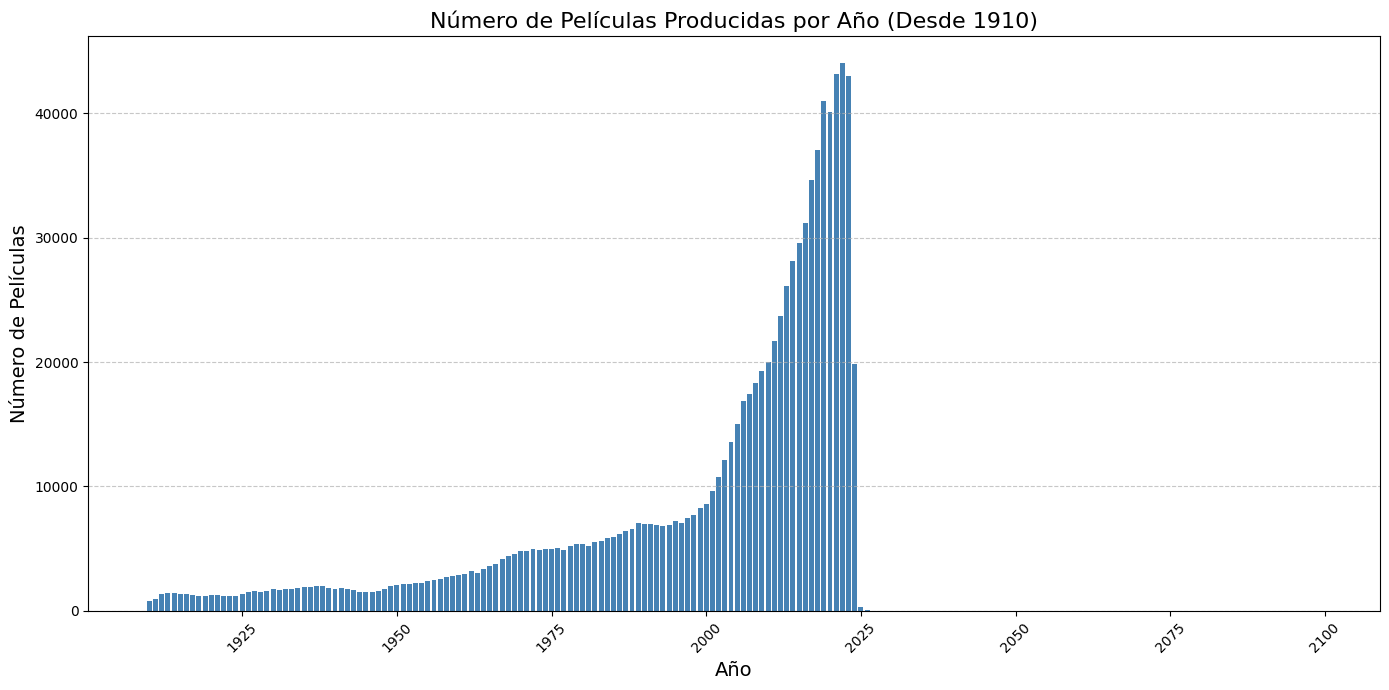

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Intentar cargar el dataset ignorando posibles errores de tokenización o líneas problemáticas
try:
    df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv', engine='python')
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

# Asegurarse de que los datos están en formato DataFrame
data = pd.DataFrame(df)

# Convertir la columna de fecha a datetime y extraer el año
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year

# Filtrar los datos para incluir solo las películas desde 1910 en adelante
filtered_data = data[data['year'] >= 1910]

# Contar el número de películas por año
movies_per_year = filtered_data['year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
plt.bar(movies_per_year.index, movies_per_year.values, color='steelblue')
plt.title('Número de Películas Producidas por Año (Desde 1910)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Películas', fontsize=14)
plt.xticks(rotation=45)

# Ajustar la gráfica para una mejor visualización
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Intentar cargar el dataset ignorando posibles errores de tokenización o líneas problemáticas
try:
    df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv', engine='python')
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

# Asegurarse de que los datos están en formato DataFrame
data = pd.DataFrame(df)

# Filtrar las columnas relevantes
filtered_data = data[['reviews', 'revenue']].copy()

# Asegurarse de que la columna 'reviews' no es nula
filtered_data = filtered_data.dropna(subset=['reviews'])

# Función para calcular el sentimiento de una reseña
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Aplicar la función para obtener el sentimiento
filtered_data['sentiment'] = filtered_data['reviews'].apply(get_sentiment)

# Calcular el sentimiento promedio por película
average_sentiment = filtered_data.groupby('revenue').agg({'sentiment': 'mean'}).reset_index()

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Gráfico de dispersión: Sentimiento promedio vs Revenue
sns.scatterplot(x='sentiment', y='revenue', data=average_sentiment, color='blue', alpha=0.6)

# Ajustar la escala del eje Y para mejor visibilidad
plt.yscale('log')

# Agregar etiquetas y título
plt.title('Análisis de Sentimientos: Influencia de Críticas en el Éxito Comercial', fontsize=16)
plt.xlabel('Sentimiento Promedio', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)

# Ajustar la gráfica para una mejor visualización
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [3]:
# prompt: can u create a heatmap using the library ‘Matplotlib Pyplot’ bout this proyect like this plt.figure(figsize=(10,8))sns.heatmap(continhency_table, annot= true ,cmap="coolwarm") plt.title("mapa de calor de) plt.show() this is only a example bout the thing im needeed for

# Intentar cargar el dataset ignorando posibles errores de tokenización o líneas problemáticas
try:
    df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv', engine='python')
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")

# Asegurarse de que los datos están en formato DataFrame
data = pd.DataFrame(df)

# Seleccionar las columnas relevantes para el mapa de calor (por ejemplo, género y popularidad)
heatmap_data = data[['genres', 'popularity']].copy()

# Separar los géneros en múltiples filas para cada película
heatmap_data = heatmap_data.assign(genres=heatmap_data['genres'].str.split(',')).explode('genres')

# Eliminar espacios en blanco adicionales en la columna 'genres'
heatmap_data['genres'] = heatmap_data['genres'].str.strip()

# Crear una tabla de contingencia (cross-tabulation) para contar la frecuencia de cada género y popularidad
contingency_table = pd.crosstab(heatmap_data['genres'], heatmap_data['popularity'])

# Crear el mapa de calor con Matplotlib Pyplot y Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Popularidad por Género")
plt.show()


KeyboardInterrupt: 